In [97]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from joblib import dump

In [27]:
import statsmodels.api as sm

In [4]:
data = pd.read_csv('hair-fall-data.csv')

In [5]:
data.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [6]:
rows, cols = data.shape[0], data.shape[1]

print(f'Rows: {rows}')
print(f'Columns: {cols}')

Rows: 999
Columns: 13


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [8]:
data.columns = data.columns.str.strip().str.replace(" ", "_")

data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


# EDA

In [33]:
data_eda = data.copy()

data_eda.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [34]:
data_eda = data_eda.drop('Id', axis = 1)

In [35]:
numerical_feature = 'Age'

categorical_features = data_eda.select_dtypes(include = ['object', 'category']).columns.to_list()

# 

The histogram provides a visual representation of the distribution of the numerical feature in the dataset. It shows the concentration of data points within different ranges of values, allowing for insights into the data's distribution and density.

# 

In [38]:
fig = px.histogram(data_eda, x=numerical_feature, marginal="rug", nbins=30, opacity=0.7, color_discrete_sequence=['green'])

fig.update_layout(
    title=f"{numerical_feature}",
    xaxis_title=numerical_feature,
    yaxis_title="Density"
)

fig.show()

QQ Plot Interpretation:

Purpose: QQ plots visualize the alignment of your data's distribution with a theoretical distribution (often a normal distribution).
Axes:
X-axis: Theoretical quantiles from the assumed distribution.
Y-axis: Sample quantiles from your actual data.
Reference Line: The diagonal red line represents perfect alignment (y=x).
Patterns:
Points closely following the reference line indicate a good fit with the assumed distribution.
Systematic deviations (e.g., S-shape, curvature) suggest a different distribution.

# 

In [39]:
theoretical_quantiles = np.sort(np.random.normal(loc=data_eda[numerical_feature].mean(), scale=data_eda[numerical_feature].std(), size=len(data_eda)))

sample_quantiles = np.sort(data_eda[numerical_feature])

fig = go.Figure()

fig.add_trace(go.Scatter(x=theoretical_quantiles, y=sample_quantiles, mode='markers', marker=dict(color='blue'), name='Data'))

fig.add_trace(go.Scatter(x=theoretical_quantiles, y=theoretical_quantiles, mode='lines', marker=dict(color='red'), name='y=x'))

fig.update_layout(
    title=f"QQ Plot for {numerical_feature}",
    xaxis_title="Theoretical Quantiles",
    yaxis_title="Sample Quantiles"
)

fig.show()

Skewness is a measure of the asymmetry of the distribution of the numerical feature.<br>
If the skewness is:<br>
    Close to 0: The distribution is approximately symmetric.<br>
    Greater than 0: The distribution is right-skewed (longer tail on the right).<br>
    Less than 0: The distribution is left-skewed (longer tail on the left).<br>


Kurtosis measures the "tailedness" or peakedness of the distribution.<br>
If the kurtosis is:<br>
    Equal to 3 (excess kurtosis): The distribution has the same peakedness as a normal distribution.<br>
    Greater than 3: The distribution is leptokurtic, meaning it has heavier tails and is more peaked than a         normal distribution.<br>
    Less than 3: The distribution is platykurtic, meaning it has lighter tails and is less peaked than a normal     distribution.<br>

# 

In [40]:
print(f'Skewness: {data_eda[numerical_feature].skew()}')
print(f'Kurtosis: {data_eda[numerical_feature].kurt()}')

Skewness: -0.034500434760795506
Kurtosis: -1.1456459144705788


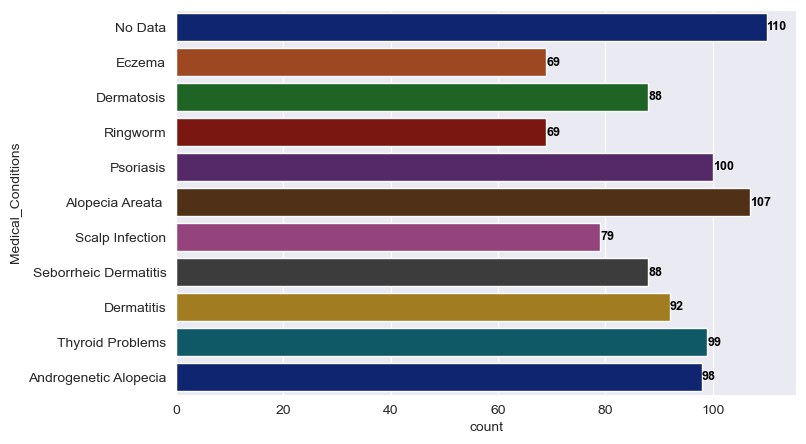

In [43]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(data_eda, y = categorical_features[2], palette = 'dark')

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 9, fontweight = 'bold', color = 'black')

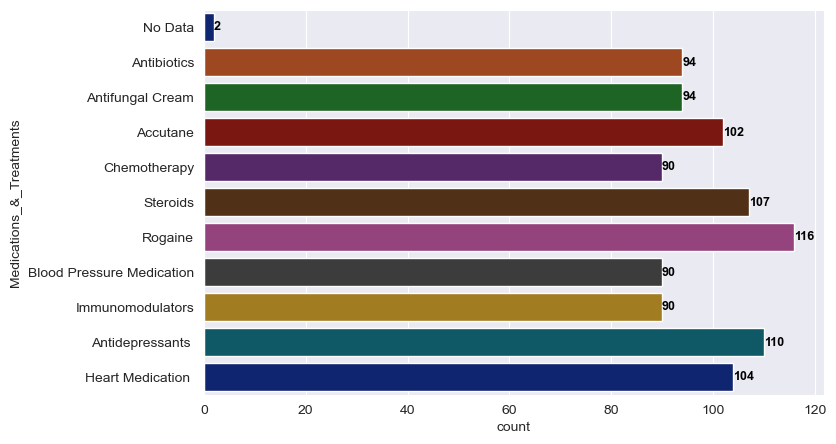

In [44]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(data_eda, y = categorical_features[3], palette = 'dark')

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 9, fontweight = 'bold', color = 'black')

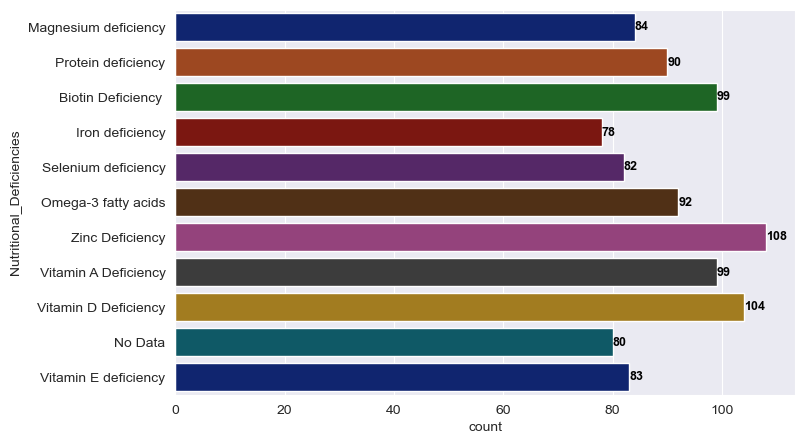

In [45]:
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (8,5))
ax = sns.countplot(data_eda, y = categorical_features[4], palette = 'dark')

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 9, fontweight = 'bold', color = 'black')

/var/folders/kx/tk0yvv9j56s1dwjc5nmjg3dr0000gq/T/ipykernel_26660/3108209658.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



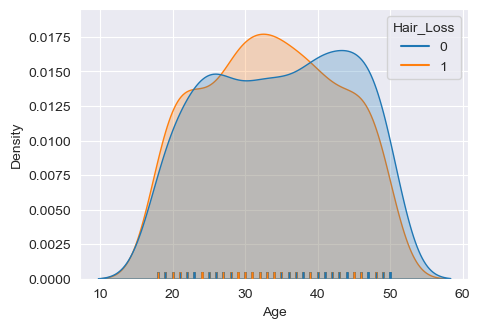

In [47]:
fig,ax = plt.subplots(figsize = (5,3.5))
sns.kdeplot(data_eda, x = 'Age', hue = 'Hair_Loss', fill = True, ax = ax)
sns.rugplot(data_eda, x = 'Age', hue = 'Hair_Loss', ax = ax)
fig.show()

# 

# Prediction Modeling

In [50]:
model_data = data.copy()

In [51]:
model_data.head()

,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [54]:
categorical_features = model_data.select_dtypes(include = ['object', 'category']).columns.to_list()

In [55]:
for i in categorical_features:
    print(f'{i}: {model_data[i].unique()}\n')

Genetics: ['Yes' 'No']

Hormonal_Changes: ['No' 'Yes']

Medical_Conditions: ['No Data' 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia']

Medications_&_Treatments: ['No Data' 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication ']

Nutritional_Deficiencies: ['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' 'No Data'
 'Vitamin E deficiency']

Stress: ['Moderate' 'High' 'Low']

Poor_Hair_Care_Habits: ['Yes' 'No']

Environmental_Factors: ['Yes' 'No']

Smoking: ['No' 'Yes']

Weight_Loss: ['No' 'Yes']



In [57]:
model_data = model_data.drop('Id', axis = 1)
model_data.head()

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [62]:
categorical_cols = ['Genetics', 'Hormonal_Changes', 'Medical_Conditions', 
                    'Medications_&_Treatments', 'Nutritional_Deficiencies', 
                    'Stress', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 
                    'Smoking', 'Weight_Loss']

In [68]:
encoded_dfs = []
encoders = {}
for col in categorical_cols:
    onehot_encoder = OneHotEncoder(sparse=False)
    encoded_values = onehot_encoder.fit_transform(model_data[[col]])
    encoded_df = pd.DataFrame(encoded_values, columns=[f"{col}_{i}" for i in range(encoded_values.shape[1])])
    encoded_dfs.append(encoded_df)
    # Save the encoder
    encoders[col] = onehot_encoder
    dump(onehot_encoder, f'encoders/{col}_encoder.joblib')

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will

In [70]:
df_encoded = pd.concat([model_data.drop(columns=categorical_cols), *encoded_dfs], axis=1)

In [71]:
df_encoded

,Age,Hair_Loss,Genetics_0,Genetics_1,Hormonal_Changes_0,Hormonal_Changes_1,Medical_Conditions_0,Medical_Conditions_1,Medical_Conditions_2,Medical_Conditions_3,...,Stress_1,Stress_2,Poor_Hair_Care_Habits_0,Poor_Hair_Care_Habits_1,Environmental_Factors_0,Environmental_Factors_1,Smoking_0,Smoking_1,Weight_Loss_0,Weight_Loss_1
0,19,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,43,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,26,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,46,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,30,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,33,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
995,47,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
996,20,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
997,32,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [73]:
X = df_encoded.drop(columns=['Hair_Loss'])
y = df_encoded['Hair_Loss']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
dump(scaler, 'scaler/scaler.joblib')

['scaler.joblib']

In [81]:
model = Sequential([
    Dense(2048, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2048)              102400    
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)               

In [87]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [88]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/50
20/20 [==============================] - 1s 50ms/step - loss: 3.6140e-06 - accuracy: 1.0000 - val_loss: 5.5148 - val_accuracy: 0.5063
Epoch 2/50
 1/20 [>.............................] - ETA: 0s - loss: 4.4235e-06 - accuracy: 1.0000

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



20/20 [==============================] - 1s 41ms/step - loss: 3.3821e-06 - accuracy: 1.0000 - val_loss: 5.5367 - val_accuracy: 0.5063
Epoch 3/50
20/20 [==============================] - 1s 43ms/step - loss: 3.1734e-06 - accuracy: 1.0000 - val_loss: 5.5594 - val_accuracy: 0.5063
Epoch 4/50
20/20 [==============================] - 1s 42ms/step - loss: 2.9701e-06 - accuracy: 1.0000 - val_loss: 5.5790 - val_accuracy: 0.5063
Epoch 5/50
20/20 [==============================] - 1s 43ms/step - loss: 2.8015e-06 - accuracy: 1.0000 - val_loss: 5.6006 - val_accuracy: 0.5063
Epoch 6/50
20/20 [==============================] - 1s 43ms/step - loss: 2.6349e-06 - accuracy: 1.0000 - val_loss: 5.6250 - val_accuracy: 0.5063


In [91]:
best_model = load_model('best_model.h5')

In [92]:
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 4ms/step - loss: 6.5476 - accuracy: 0.4700
Test Loss: 6.547603607177734, Test Accuracy: 0.4699999988079071


In [93]:
best_model.save('hair_loss_prediction_model.h5')

In [94]:
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

In [117]:
from joblib import load
from tensorflow.keras.models import load_model
import numpy as np

In [123]:
def make_prediction(data_point):
    categorical_cols = ['Genetics', 'Hormonal_Changes', 'Medical_Conditions', 
                        'Medications_&_Treatments', 'Nutritional_Deficiencies', 
                        'Stress', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 
                        'Smoking', 'Weight_Loss']
    encoded_data_point = []
    for col in categorical_cols:
        encoder = load(f'encoders/{col}_encoder.joblib')
        encoded_value = encoder.transform([[data_point[col]]])
        encoded_data_point.extend(encoded_value[0])
    scaler = load('scaler/scaler.joblib')
    numerical_data = [data_point['Age']]
    scaled_data_point = np.concatenate((numerical_data, encoded_data_point))
    scaled_data_point = scaler.transform(np.array([scaled_data_point]).reshape(1, -1))
    model = load_model('hair_loss_prediction_model.h5')
    prediction = model.predict(scaled_data_point)
    return prediction

In [140]:
example_data_point = {'Age': '21', 'Genetics': 'Yes', 'Hormonal_Changes': 'Yes', 'Medical_Conditions': 'No Data', 'Medications_&_Treatments': 'No Data', 'Nutritional_Deficiencies': 'Magnesium deficiency', 'Stress': 'Moderate', 'Poor_Hair_Care_Habits': 'Yes', 'Environmental_Factors': 'Yes', 'Smoking': 'No', 'Weight_Loss': 'No'}
prediction = make_prediction(example_data_point)
print(f'Prediction: {prediction}')

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

/Users/amitsaraswat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does

1/1 [==============================] - 0s 67ms/step
Prediction: [[7.4043615e-05]]


In [141]:
prediction[0]

array([7.4043615e-05], dtype=float32)

In [146]:
prediction[0][0] < 0.5

True